In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
combine_pd_old = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID") 

# Display the data table for preview
#mouse_metadata.head()
#study_results.head()
combine_pd_old.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
totalmicedistinct =combine_pd_old['Mouse ID'].nunique()
totalmicedistinct


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
drop_dup_mouse_id = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

drop_dup_mouse_id

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_pd_old["Mouse ID"] == "g989"
combine_pd_old.loc[combine_pd_old["Mouse ID"] == "g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_results = study_results[study_results['Mouse ID'].isin(drop_dup_mouse_id)==False]
clean_mouse_metadata = mouse_metadata[mouse_metadata['Mouse ID'].isin(drop_dup_mouse_id)==False]
combine_pd = pd.merge(clean_study_results, clean_mouse_metadata, how="left", on = "Mouse ID")
#sort by Timepoint 
sort_by_time = combine_pd.sort_values("Timepoint", ascending= True) 

#to reset index
all_sort_by_time = sort_by_time.reset_index()
del all_sort_by_time['index']
all_sort_by_time.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,s166,0,45.0,0,Placebo,Male,19,27
2,x773,0,45.0,0,Placebo,Female,21,30
3,w167,0,45.0,0,Placebo,Female,6,28
4,t718,0,45.0,0,Placebo,Female,10,30


In [7]:
# Checking the number of mice in the clean DataFrame.
totalmicedistinct_New =combine_pd['Mouse ID'].nunique()
totalmicedistinct_New

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = combine_pd.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = combine_pd.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = combine_pd.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_deviation = combine_pd.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = combine_pd.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

data = {
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": standard_deviation,
    "SEM": sem
}

summary_table = pd.DataFrame(data)
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_group_by = combine_pd.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


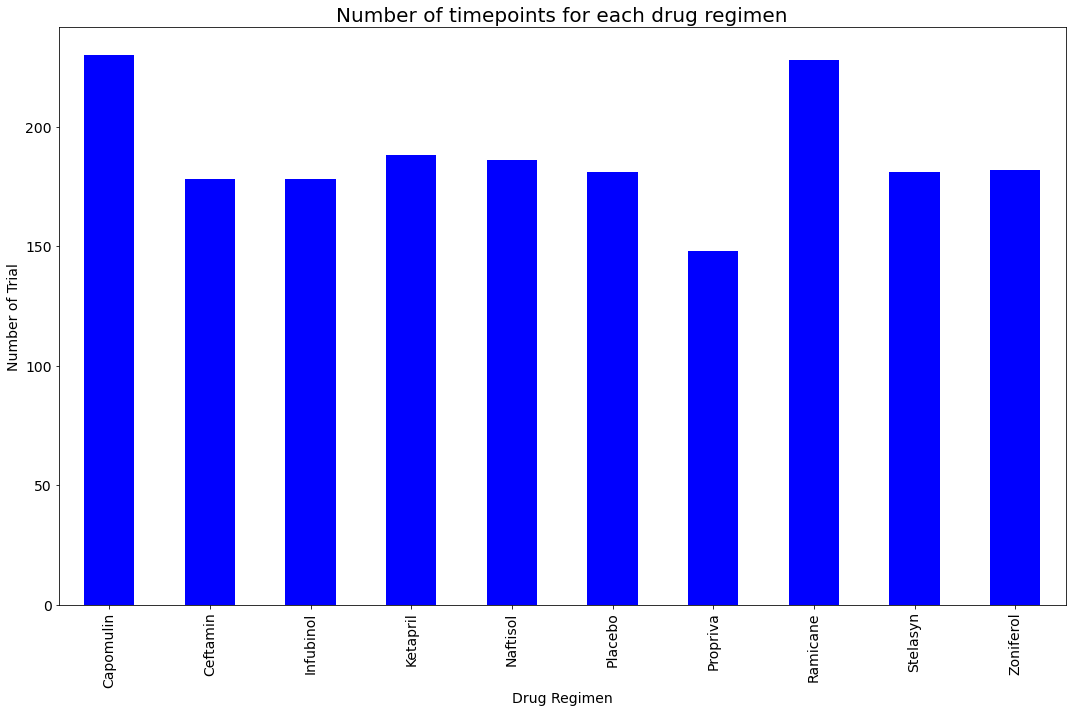

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

count_time_points = combine_pd.groupby(["Drug Regimen"]).count()["Timepoint"] 


plot_pandas = count_time_points.plot.bar(figsize=(15,10), color='b',fontsize = 14)
count_time_points
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Trial",fontsize = 14)
plt.title("Number of timepoints for each drug regimen",fontsize = 20)

plt.savefig("Number_of_Time_per_treat.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

count_time_points

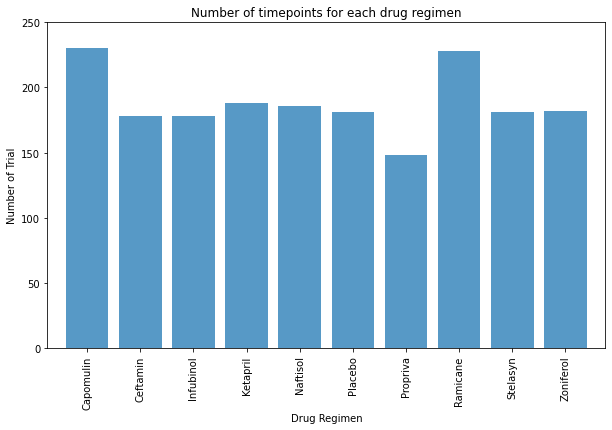

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Define data for bar plot so "Drug Regimen" is x-axis label

x_axis = np.arange(len(count_time_points))
forpanbar = pd.DataFrame(count_time_points)
tick_locations = [x for x in x_axis]

#for x in x_axis:
#tick_locations.append(x)

plt.figure(figsize=(10,6))
#plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
#plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

newtry = forpanbar.reset_index()
newtry

plt.bar(x_axis, forpanbar['Timepoint'], alpha=0.75, align="center")
plt.xticks(tick_locations, newtry['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(count_time_points)-.25)
plt.ylim(0, 250)

plt.title("Number of timepoints for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Trial")

plt.savefig('barplot2')
plt.show()

<AxesSubplot:ylabel='Sex'>

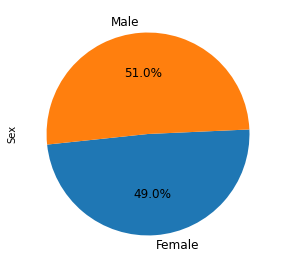

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = combine_pd.groupby('Sex')
gender_qty = gender["Sex"].count()

# Create pie plot with data
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect = 'equal')
gender_qty.plot(kind='pie', y = "Quantity", ax=ax1, autopct = '%1.1f%%',
              startangle = 186, shadow = False, legend = False, fontsize = 12)

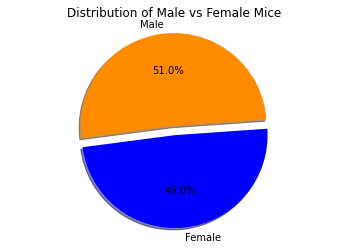

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Define DataFrame; based on mouse sex, show distribution of female versus male mice using Matplotlib's 'pyplot'
# Generate a pie plot showing the distribution of female versus male mice using pyplot 
gender = combine_pd["Sex"].value_counts()

#Labels sections of the pie plot
labels = ["Male", "Female"]

# Define colors of each section of pie plot
colors = ["darkorange", "blue"]

# Define counts
counts = np.array(gender)

# Define each section
explode = (0.1, 0)

# Direct matplotlib to create a pie chart based upon the above data
plt.pie(gender, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow = True, startangle = 364)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of Male vs Female Mice")

# Display pie plot
plt.show()

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = combine_pd.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe
merged_data_lasttp = last_timepoint.merge(combine_pd, on=["Mouse ID", "Timepoint"], how="left")
merged_data_lasttp.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data_lasttp.loc[merged_data_lasttp["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    total_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


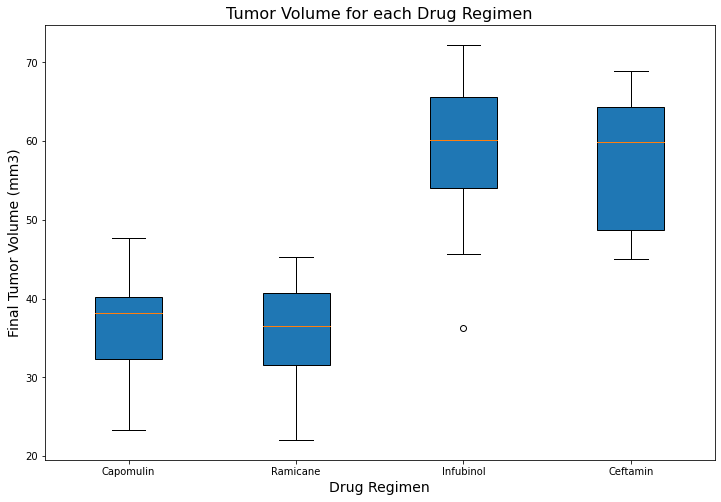

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(total_tumor_vol, labels=treatments, widths = 0.4, patch_artist=True,vert=True)

plt.savefig("pyplot_boxplot_final_tumor_vol.png", bbox_inches = "tight")
plt.show()

Text(0.5, 1.0, 'Time Point vs Tumor Volume of Mouse s185 with Capomulin Treatment')

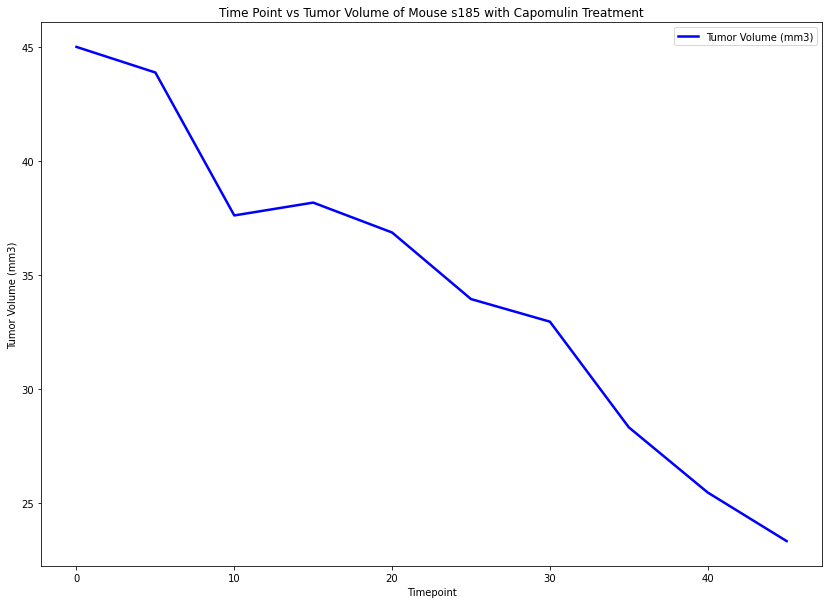

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = combine_pd.loc[combine_pd["Drug Regimen"] == "Capomulin",:]
capomulin_df.head()

# Isolate data of a single mouse (s185)
# Remember loc -> slicing by names!
capomulin_s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capomulin_s185_df.head()

# Isolate columns of single mouse (s185)
capomulin_s185_df = capomulin_s185_df.loc[:,["Timepoint", "Tumor Volume (mm3)"]]

# Set the index of capomulin_s185_df
capomulin_s185_df = capomulin_s185_df.reset_index(drop=True)

# Generate a line plot of time point versus tumor volume for a mouse (s185) treated with Capomulin
capomulin_s185_df.set_index('Timepoint').plot(figsize=(14,10), linewidth=2.5, color='blue')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Time Point vs Tumor Volume of Mouse s185 with Capomulin Treatment")

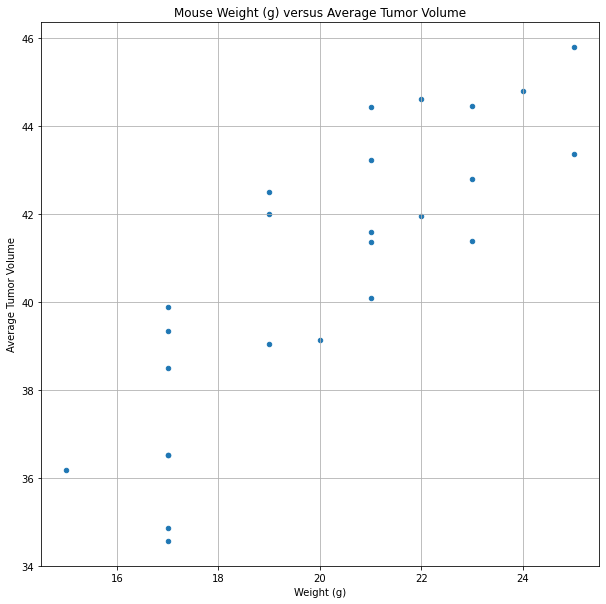

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Isolate columns of Capomulin
capomulin_filtered_df = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_filtered_df.head()

# Calculate the average tumor volume per mouse and weight with drug regimen = Capomulin
capomulin_mean = pd.DataFrame(capomulin_filtered_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Rename tumor volume column to Average Tumor Volume
capomulin_mean = capomulin_mean.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
capomulin_mean.head()

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mean = capomulin_mean.set_index('Mouse ID')

capomulin_mean.plot(kind = "scatter", x="Weight (g)", y="Average Tumor Volume", grid=True, figsize=(10,10), 
                    title="Mouse Weight (g) versus Average Tumor Volume")
plt.show()

The correlation between mouse weight and average tumor volume is 0.84.


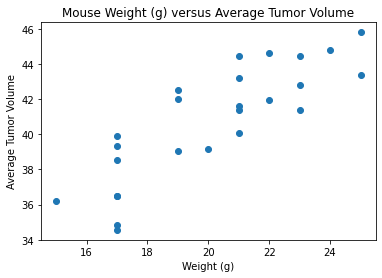

Predicted y is 42.54983369121531 vs an actual value of 41.963635634
The r-squared is: 0.7088568047708717


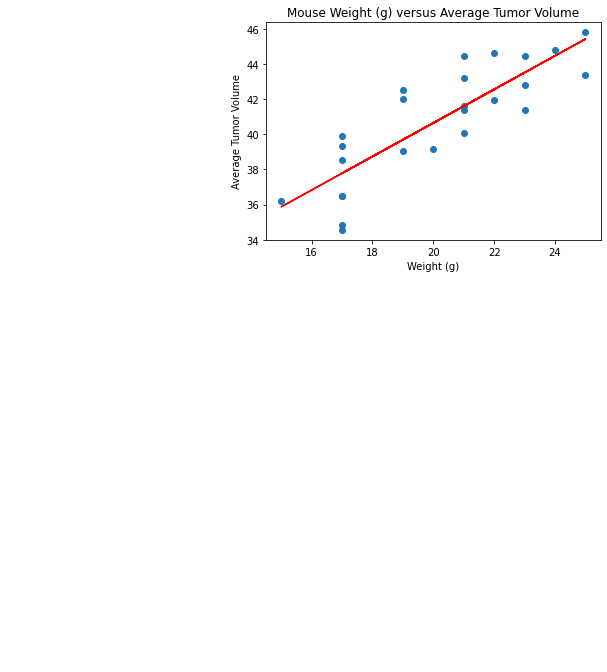

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Define dependencies

from scipy.stats import linregress
from sklearn import datasets

# Isolate mouse weight and average tumor volume
mouse_weight = capomulin_mean.iloc[:,0]
average_tumor_volume = capomulin_mean.iloc[:,1]

# Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight,average_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}.")

# Create beginning steps for linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']

plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume")
plt.show()

# Add the linear regression equation and line to plot
x_values = capomulin_mean['Weight (g)']
y_values = capomulin_mean['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Check x values
x_values

# y=mx+b
y=slope*x_values[0]+intercept
print(f'Predicted y is {y} vs an actual value of {y_values[0]}')

# Calculate regress values, r-squared, etc
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight (g) versus Average Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()